# Compare Throughputs

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : February 14th 2023
- last update : February 14th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

In [5]:
DATE="20230118, 20220630, 20220317"

In [6]:
path_filenames_from_bouguerlines = "dataout"

In [9]:
filenames_from_bouguerlines = [
"MLfit_bouguer_linearfit-20230118-empty~holo4_003-config_PSF2DFFM-REBIN2_30nm_out.csv",
"MLfit_bouguer_linearfit-20230118-OG550_65mm_1~holo4_003-config_PSF2DFFM-REBIN2_30nm_out.csv",
"MLfit_bouguer_linearfit-20220630-empty~holo4_003-config_PSF2DFFM-REBIN2_30nm_out.csv",
"MLfit_bouguer_linearfit-20220317-empty~holo4_003-config_PSF2DFFM-REBIN2_30nm_out.csv",
]

In [10]:
tags_from_bouguerlines = ["2023-01-18, No filter", "2023-01-18, OG550 filter","2022-06-30, No filter","2022-03-17, No filter" ]

In [11]:
all_dfs_from_bouguerlines = []
for filename in filenames_from_bouguerlines:
    all_dfs_from_bouguerlines.append(pd.read_csv(os.path.join(path_filenames_from_bouguerlines,filename)))

In [12]:
NFB = len(all_dfs_from_bouguerlines)

In [13]:
all_dfs_from_bouguerlines[0].head()

,Unnamed: 0,wavelength,throu,errthrou,sedtoa,errsedtoa
0,0,350.000000,0.007242,0.001061,4.601764e-12,6.740500e-13
1,1,364.285714,0.011785,0.001018,1.386885e-11,1.198067e-12
2,2,378.571429,0.025942,0.001508,2.854496e-11,1.658985e-12
3,3,392.857143,0.045312,0.001444,4.613566e-11,1.470117e-12
4,4,407.142857,0.063824,0.001262,5.818757e-11,1.150280e-12


In [14]:
hls_colors = sns.color_palette("hls", NFB)

Text(0.5, 0, '$\\lambda$  (nm)')

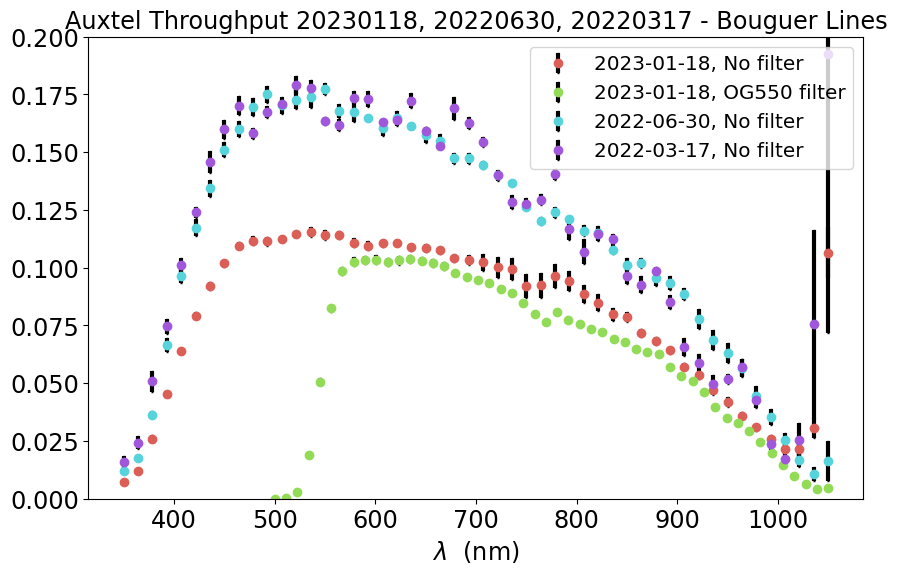

In [15]:
for idx in range(NFB):
    X=all_dfs_from_bouguerlines[idx].wavelength
    Y=all_dfs_from_bouguerlines[idx].throu
    EY=all_dfs_from_bouguerlines[idx].errthrou

    plt.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color=hls_colors[idx],ecolor="k", elinewidth=3, capsize=1,label=tags_from_bouguerlines[idx])


plt.legend(loc="upper right")
    
plt.ylim(0,0.2)
plt.title(f"Auxtel Throughput {DATE} - Bouguer Lines")
plt.xlabel("$\lambda$  (nm)")

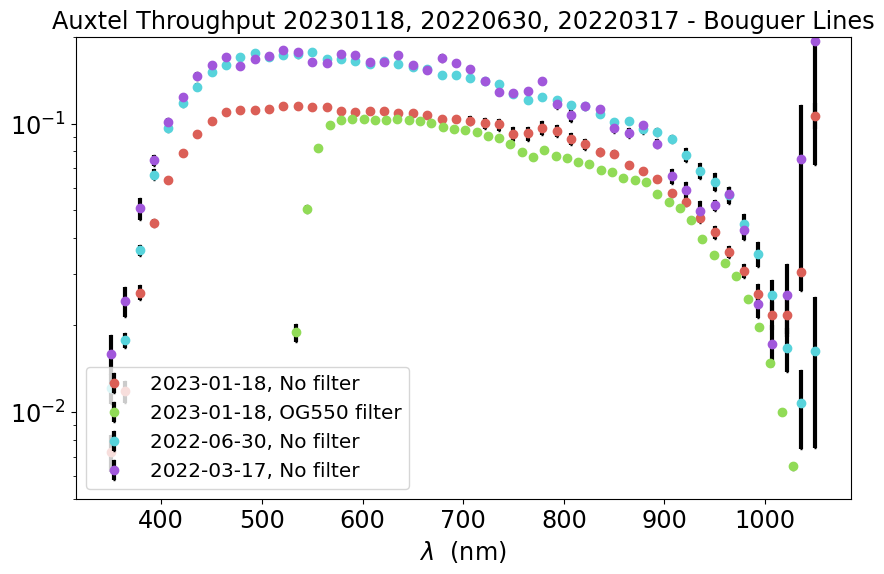

In [17]:
for idx in range(NFB):
    X=all_dfs_from_bouguerlines[idx].wavelength
    Y=all_dfs_from_bouguerlines[idx].throu
    EY=all_dfs_from_bouguerlines[idx].errthrou

    plt.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color=hls_colors[idx],ecolor="k", elinewidth=3, capsize=1,label=tags_from_bouguerlines[idx])


plt.legend(loc="upper right")
    
plt.ylim(0,0.2)
plt.title(f"Auxtel Throughput {DATE} - Bouguer Lines")
plt.xlabel("$\lambda$  (nm)")
plt.yscale('log')
plt.ylim(5e-3,0.2)
plt.legend(loc="lower left")

# Ratio

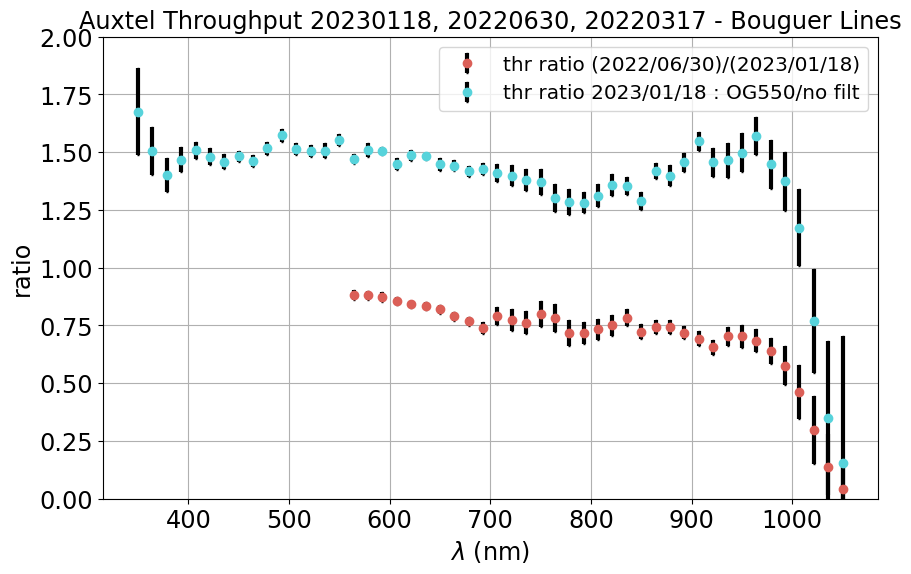

In [28]:
hls_colors = sns.color_palette("hls",2)

label_1 = "thr ratio (2022/06/30)/(2023/01/18)"
label_2 = "thr ratio 2023/01/18 : OG550/no filt"

# January 2023, no filter
X0=all_dfs_from_bouguerlines[0].wavelength
Y0=all_dfs_from_bouguerlines[0].throu
EY0=all_dfs_from_bouguerlines[0].errthrou

# January 2023, filter 
X1=all_dfs_from_bouguerlines[1].wavelength
Y1=all_dfs_from_bouguerlines[1].throu
EY1=all_dfs_from_bouguerlines[1].errthrou

ratio1 = Y1/Y0
eratio1 = np.sqrt((EY0/Y0)**2+(EY1/Y1)**2) 
index1 = np.where(X0> 550)[0] 
ratio1 = ratio1[index1]
eratio1 = eratio1[index1]
WL1 = X0[index1]


# June 2022
X2=all_dfs_from_bouguerlines[2].wavelength
Y2=all_dfs_from_bouguerlines[2].throu
EY2=all_dfs_from_bouguerlines[2].errthrou

plt.errorbar(WL1,ratio1,eratio1 , xerr=None, fmt='o',color=hls_colors[0],ecolor="k", elinewidth=3, capsize=1,label=label_1)


ratio2 = Y2/Y0
eratio2 = np.sqrt((EY0/Y0)**2+(EY2/Y2)**2) 
WL2 = X0
plt.errorbar(WL2,ratio2,eratio2 , xerr=None, fmt='o',color=hls_colors[1],ecolor="k", elinewidth=3, capsize=1,label=label_2)

plt.legend(loc="upper right")
    

plt.title(f"Auxtel Throughput {DATE} - Bouguer Lines")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("ratio")
plt.ylim(0,2)
plt.grid()